# Pie Chart

**Chart Utilization:** Pie chart is used mainly for comparations

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Sample Scenario: Pie sales

Sarah and her husband have started a new pie sales business. They are producing pies in different flavors and after some days they've noticed there was somes flavors with better acceptance from the customers than others.
They want to plot a chart to analyse how to invest their resorces at the flavors the customers like more.
Sales data (mean value from the last 15 days):

* Chocolate: 15%
* Lemon: 33%
* Strawberry: 22%
* Apple: 25%
* Blueberry: 5%

In [2]:
# first we have to prepare our data:
pie_sales = [ 15, 33, 22, 25, 5 ]
pie_names = [ "Chocolate", "Lemon", "Strawberry", "Apple", "Blueberry" ]

Text(0.5, 1.0, 'Pie Sales')

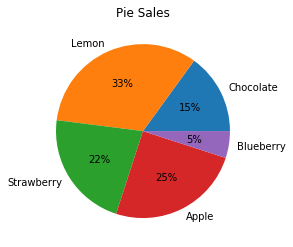

In [3]:
## It is very easy to create a simple pie chart =)
plt.pie(pie_sales, labels=pie_names, autopct="%1.0f%%") # the autopct argument is to add the values on the chart

# We can add a title too
plt.title("Pie Sales")

Now we know the pies Sarah should produce more! Time to go shop the supplies and start the production!

# Sample Scenario: Market List

Sarah is writing a list of things to buy on market. She wants to produce more lemon and strawberry and you can see her market list bellow:

* flour: 5000 g
* Sugar: 2000 g
* Butter: 3500 g
* Lemon: 1600 g
* Strawberry: 1300 g

We can help Sarah to create a better visualization about this data:

In [4]:
# We need to prepare the data
amount_of_supplies = [ 5000, 2000, 3500, 1600, 1300 ]
name_of_supplies = [ "Flour", "Sugar", "Butter", "Lemon", "Strawberry" ]

In [5]:
# We will format the text into chart pieces. We need a function to do it
from functools import partial

def format_market_list(data, perc):
    """Function to format the label for pie chart pieces."""
    grams = int(round((perc / 100.0) * np.sum(data), 0))
    return "{:.1f}%\n({:d} g)".format(perc, grams)

# A Partial function is just a closure
# the next line is just like "lambda value: format_market_list(amount_of_supplies, value)"
partial_format_market_list = partial(format_market_list, amount_of_supplies)

Text(0.5, 1.0, 'Sarah Market List')

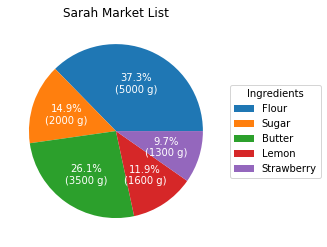

In [6]:
# Now we can create our pie chart
fig, ax = plt.subplots()
chart = ax.pie(amount_of_supplies, 
               autopct=partial_format_market_list, # Our function is used to format the labels
               textprops=dict(color="w")) # just setting the text color to be white

# We can add a legend to help Sarah to understand our chart
ax.legend(chart[0], name_of_supplies,
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1)) # This is to define the position of the legend at the chart

# Setting the title of the chart
ax.set_title("Sarah Market List")

The pie business is going so well than Sarah is thinking about to expand the production to bake donuts as well.

## Sample Scenario: The Donut Production

Sarah is starting the production of Donuts. Sarah liked the last charts and she asked us to create a new one for the Donut ingredients. Let's take a look on what we have:

* Flour: 2500
* Sugar: 500
* Butter: 800
* Cream: 1200
* Vanilla: 50

The data is very similar to the last scenario, but perhabs we can try something new.

In [7]:
# We need to prepare the data
amount_of_supplies = [ 2500, 500, 800, 1200, 50 ]
name_of_supplies = [ "Flour", "Sugar", "Butter", "Cream", "Vanilla" ]

Text(0.5, 1.0, 'Donuts Ingredients')

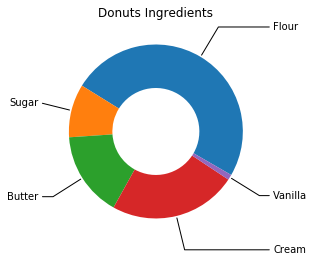

In [8]:
# We have to create the chart objects
fig, ax = plt.subplots()

# The donut chart is a variation of the pie chart
wedges, texts = ax.pie(amount_of_supplies, 
                       startangle=-30, # start angle to the first piece of the chart
                       wedgeprops=dict(width=0.5)) # this argument is responsable to create the donut shape

# Configurations to the line used to conect labens and chart pieces
line_config = dict(arrowprops=dict(arrowstyle="-"), va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1 # math to get the middle angle of the chart piece
    y = np.sin(np.deg2rad(ang)) # get the sin of the angle at the circunference - used to define text and line start positions
    x = np.cos(np.deg2rad(ang)) # get the cos of the angle at the circunference - used to define text and line start positions
    
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))] # text should be at right or left side of the arrow
    connectionstyle = "angle,angleA=0,angleB={}".format(ang) # This code is just to create that angle at the line when it is too big
    line_config["arrowprops"].update({"connectionstyle": connectionstyle})
    
    ax.annotate(name_of_supplies[i], # text to the chart labels
                xy=(x, y), # start position of the line
                xytext=(1.35*np.sign(x), 1.4*y), # Start position of the text
                horizontalalignment=horizontalalignment, # aligment to the text (to avoit have the text over the line)
                **line_config) # add line configurations from previous steps

# We can add the title to our chart
ax.set_title("Donuts Ingredients")

This chart is a little more complex to build, but Sarah loved it! It is easy to read and understand.
How about to see if our charts are helping Sarah on her sales?

## Sample Scenario: Check the sales numbers

The sales are going well and everything looks fine on Sarah's store. Time to check the sales numbers to confirm if the sales are going so well as we imagine.

* Pie Sales: 733 units
    - Chocolate: 110
    - Lemon: 242
    - Strawberry: 161
    - Apple: 183
    - Blueberry: 37
* Donuts Sales: 320
    - Cream: 230
    - Vanilla: 90
  
Time to create our last pie chart

In [9]:
# First we have to create the arrays with data
total_sales = [ 733, 320 ] # total for pies and donuts
product_sales = [ 110, 242, 161, 183, 37, # pie sales
                  230, 90 ] # donuts sales

# now the labels
total_labels = [ "Total Pies", "Total Donuts" ]
product_labels = [ "Chocolate Pie", "Lemon Pie", "Strawberry Pie", "Apple Pie", "Blueberry Pie", 
                   "Cream Donut", "Vanilla Donut" ]

Text(0.5, 1.0, 'Sarah Sales')

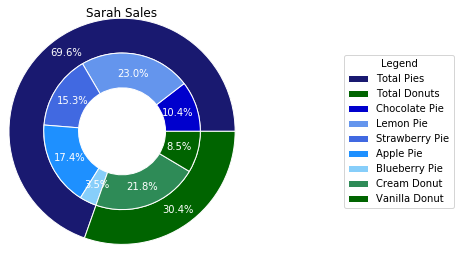

In [10]:
fig, ax = plt.subplots()

# to create nested charts we need to control its size
size = 0.4

# I'm defining manually the colors to force items from the same group to have colors close to each other
outer_colors = [ "#191970", "#006400" ]
inner_colors = [ "#0000CD", "#6495ED", "#4169E1", "#1E90FF", "#87CEFA", "#2E8B57", "#006400" ]

# This is the extermal pie chart
external_chart = ax.pie(total_sales, radius=1.3, colors=outer_colors, autopct="%.1f%%", pctdistance=.85,
                        wedgeprops=dict(width=size, edgecolor='w'), textprops=dict(color="w"))

# this is the internal pie chart
internal_chart = ax.pie(product_sales, radius=1.3-size, colors=inner_colors, autopct="%.1f%%", pctdistance=.75,
                        wedgeprops=dict(width=size, edgecolor='w'), textprops=dict(color="w"))

# it will be good to have legends right?
conc_charts = external_chart[0] + internal_chart[0]
conc_labels = total_labels + product_labels

ax.legend(conc_charts, conc_labels,
          title="Legend",
          loc="center left",
          bbox_to_anchor=(1.5, 0, 0.5, 1))

# now is the title time
ax.set_title("Sarah Sales")

Now Sarah can see all sales in a single chart! That's amazing!<br>
With all this data she can start to make her store way bigger :)